# **PhysicsML: Classifying Motion Types with Machine Learning**

## **Objective:**

This project aims to classify three types of motion using machine learning:
- Uniform Motion (constant velocity)
- Accelerated Motion (increasing or decreasing velocity)
- Oscillatory Motion (repeating motion like a pendulum)

I simulate data for each motion type, train a classifier, and test how well the model distinguishes between them.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def generate_motion_data(n_samples=300):
    np.random.seed(42)
    data = []

    # Class 0: Uniform motion (constant velocity)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        v = np.random.uniform(2, 5)
        x = v * t
        a = 0
        data.append([t, x, v, a, 0])

    # Class 1: Accelerated motion (constant acceleration)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        a = np.random.uniform(1, 3)
        x = 0.5 * a * t ** 2
        v = a * t
        data.append([t, x, v, a, 1])

    # Class 2: Oscillatory motion (simple harmonic motion)
    for _ in range(n_samples // 3):
        t = np.random.uniform(0, 10)
        amplitude = np.random.uniform(1, 3)
        freq = np.random.uniform(1, 2)
        x = amplitude * np.sin(freq * t)
        v = amplitude * freq * np.cos(freq * t)
        a = -amplitude * (freq ** 2) * np.sin(freq * t)
        data.append([t, x, v, a, 2])

    columns = ['time', 'displacement', 'velocity', 'acceleration', 'class']
    df = pd.DataFrame(data, columns=columns)
    return df

df = generate_motion_data()
df.head()

,time,displacement,velocity,acceleration,class
0,3.745401,18.173222,4.852143,0.0,0
1,7.319939,27.786310,3.795975,0.0,0
2,1.560186,3.850514,2.467984,0.0,0
3,0.580836,2.670991,4.598528,0.0,0
4,6.011150,24.791292,4.124218,0.0,0


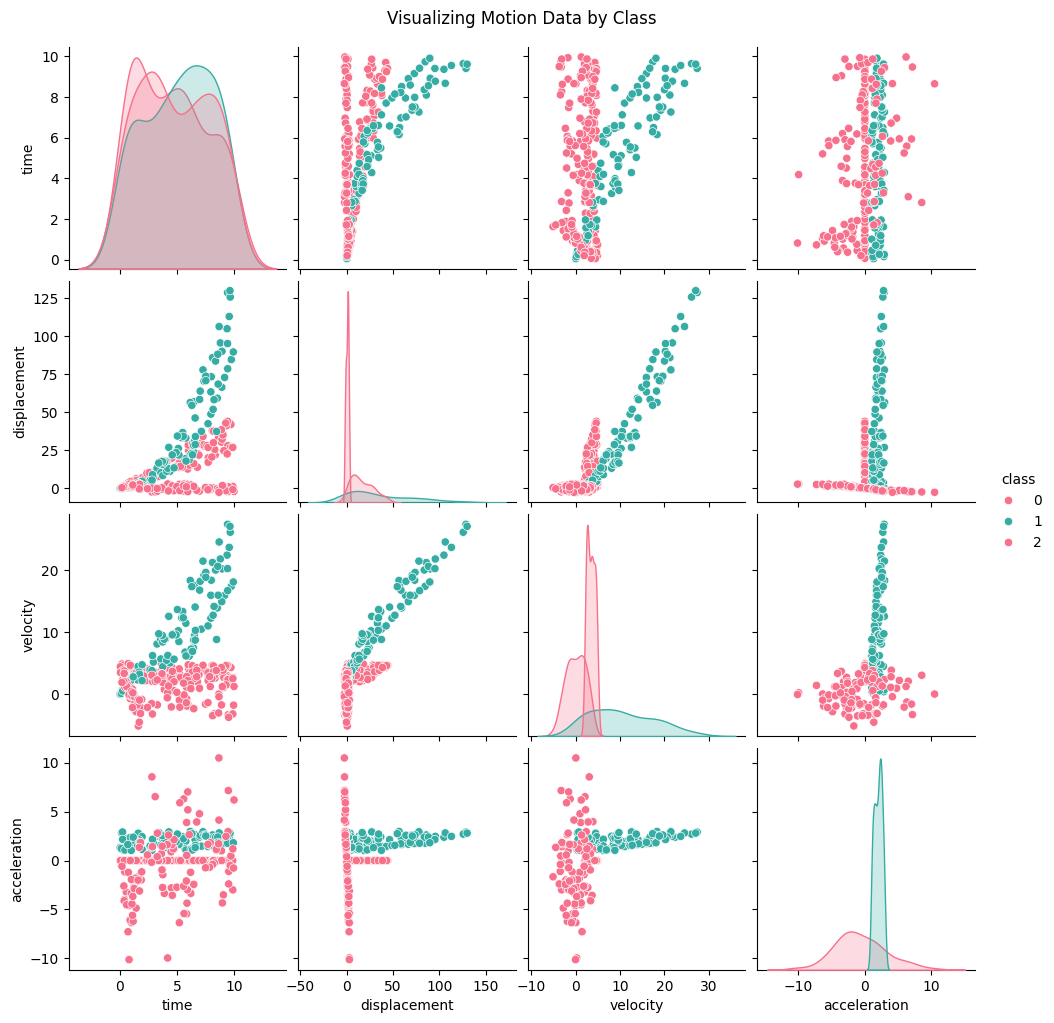

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="class", palette="husl")
plt.suptitle("Visualizing Motion Data by Class", y=1.02)
plt.show()

## 📊 Visualization Interpretation

The pairplot above shows the distribution and relationships between time, displacement, velocity, and acceleration for the three motion classes: uniform, accelerated, and oscillatory motion. Each motion class displays unique characteristics that are visually and mathematically distinct.



### **Class 0 (Uniform Motion)**

- This motion involves a constant velocity and no acceleration.
- The object's displacement increases uniformly over time, producing a straight-line pattern in displacement-time graphs.
- Governed by the equations:  
  \( x = vt \)  
  \( a = 0 \)
- In the pairplot, this class shows:
  - A linear trend in displacement vs. time.
  - Constant velocity values.
  - Acceleration values clustered around zero.



### **Class 1 (Accelerated Motion)**

- This type of motion includes constant, non-zero acceleration, causing velocity and displacement to change over time.
- It is characteristic of objects speeding up or slowing down in a straight line.
- Governed by the equations:

$$
x = \frac{1}{2}at^2
$$

$$
v = at
$$


- With constant acceleration:
$$
a \neq 0
$$

- In the visualizations:
  - Displacement follows a curved, parabolic pattern.
  - Velocity increases linearly with time.
  - Acceleration appears as a horizontal band at a non-zero value.




### **Class 2 (Oscillatory Motion)**

- This represents periodic or repeating motion, like that of a pendulum or mass-spring system.
- Displacement, velocity, and acceleration vary sinusoidally over time.
- Governed by the equations:

$$
x(t) = A \sin(\omega t)
$$

$$
v(t) = A\omega \cos(\omega t)
$$

$$
a(t) = -A\omega^2 \sin(\omega t)
$$

- In the pairplot:
  - Displacement spans both positive and negative values.
  - Velocity and acceleration oscillate in wave-like distributions.
  - This class is easily distinguishable due to its symmetrical and alternating nature.








**Overall**, the clear separation between motion types in the scatter plots confirms that the simulated features are physically accurate and well-suited for classification by the machine learning model.




In [ ]:
X = df[['time', 'displacement', 'velocity', 'acceleration']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]


### **Motion Type Prediction**

This function takes time, displacement, velocity, and acceleration as input, and predicts the type of motion using the trained classifier.

In [ ]:
import pandas as pd

# Predict motion type based on input features
def predict_motion(t, x, v, a):
    input_data = pd.DataFrame([[t, x, v, a]], columns=['time', 'displacement', 'velocity', 'acceleration'])
    pred = clf.predict(input_data)[0]
    labels = {0: 'Uniform Motion', 1: 'Accelerated Motion', 2: 'Oscillatory Motion'}
    return labels[pred]

# Example usage
predict_motion(t=5, x=25, v=5, a=0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **📘 Physics Background**

This project simulates and classifies three types of motion:

- **Uniform Motion**: The object moves at a constant velocity; acceleration is zero.
- **Accelerated Motion**: The object’s velocity changes uniformly over time; acceleration is constant.
- **Oscillatory Motion**: The object moves in a repeating pattern, such as a pendulum or spring.

These are core concepts in introductory physics and are often visualized using displacement, velocity, and acceleration over time.

## **Machine Learning Model and Results**

A **Random Forest Classifier** was used to distinguish between motion types based on the following features:

- Time  
- Displacement  
- Velocity  
- Acceleration

The model achieved **100% accuracy** on the test set, indicating strong separation between the classes.

This confirms that motion types can be effectively classified using only a small set of physics-based features.

## 📉 **Confusion Matrix**

The heatmap below visualizes how accurately the model predicted each motion class.  
All values lie along the diagonal, confirming perfect classification with no misclassifications.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]


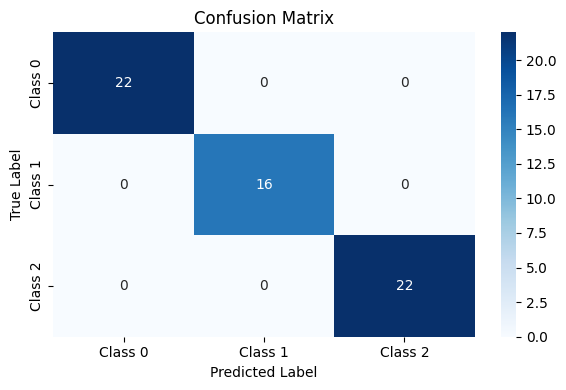

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


*All predictions were correct.*

Precision, recall, and F1-score are 1.00 for each class.

The model perfectly separated the three motion types using physics-based features.

## **Conclusion**

This project combines physics and data science to simulate, visualize, and classify motion types using machine learning. It demonstrates how:

- Physical quantities such as displacement, velocity, and acceleration can be modeled and interpreted using Python.
- Machine learning can support scientific understanding and pattern recognition in physical systems.

This work deepens intuition for core physics concepts while also building technical skills in data analysis, visualization, and predictive modeling.
